In [96]:
import matplotlib.pyplot as plt
import matplotlib as mpl # 한글 폰트 설정 (NanumGothic) 
mpl.rcParams['font.family'] = 'NanumGothic'
mpl.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지
import seaborn as sns

In [97]:
import pandas as pd
df_LetalCars = pd.read_csv('../../datasets/LetalCarOfContractType.csv')
df_LetalCars.head(3)

,id,type_of_contract,type_of_contract2,channel,datetime,Term,payment_type,product,amount,state,overdue_count,overdue,credit rating,bank,cancellation,age,Mileage
0,66758234,렌탈,Normal,서비스 방문,2019-10-20,60,CMS,K1,96900,계약확정,0,없음,9.0,새마을금고,정상,43.0,1862.0
1,66755948,렌탈,Extension_Rental,서비스 방문,2019-10-20,60,카드이체,K1,102900,계약확정,0,없음,2.0,현대카드,정상,62.0,2532.0
2,66756657,렌탈,Normal,홈쇼핑/방송,2019-10-20,60,CMS,K1,96900,계약확정,0,없음,8.0,우리은행,정상,60.0,2363.0


In [98]:
df_LetalCars.info()#describe 는 꼭 한번씩 확인 해볼 것

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51304 entries, 0 to 51303
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 51304 non-null  int64  
 1   type_of_contract   51300 non-null  object 
 2   type_of_contract2  51303 non-null  object 
 3   channel            51304 non-null  object 
 4   datetime           51304 non-null  object 
 5   Term               51304 non-null  int64  
 6   payment_type       51304 non-null  object 
 7   product            51303 non-null  object 
 8   amount             51304 non-null  int64  
 9   state              51304 non-null  object 
 10  overdue_count      51304 non-null  int64  
 11  overdue            51302 non-null  object 
 12  credit rating      42521 non-null  float64
 13  bank               48544 non-null  object 
 14  cancellation       51279 non-null  object 
 15  age                40509 non-null  float64
 16  Mileage            405

제안 7: 지불 방식에 따른 고객 행동 분석
- 문제 정의: 다양한 지불 방식(예: CMS, 카드 이체 등)을 사용하는 고객들의 행동 패턴을 분석합니다.
- 배경: 지불 방식에 따른 고객 행동을 이해함으로써, 효율적인 결제 시스템을 설계하고 고객 서비스를 개선할 수 있습니다.
-   소비항목,항목비중,페이크기,시즌,효올,카드연계,혜택,할인 #내가쓴것

### 지불방식 분포 확인

- 가장 많은 지불 방식 : CMS > 카드이체 > 무통장 > 가상계좌 > 지로
- 인사이트 : 타켓층 CMS 결제 고객으로 하는 이벤트 및 프로모션 수립해 카드이체 유도 고려

In [99]:
df_LetalCars['payment_type'].unique() #종류

array(['CMS', '카드이체', '가상계좌', '지로', '무통장'], dtype=object)

In [100]:
df_LetalCars['payment_type'].value_counts() #종류의 횟수

payment_type
CMS     32825
카드이체    15717
무통장      2085
가상계좌      612
지로         65
Name: count, dtype: int64

In [101]:
df_LetalCars['payment_type'].describe()

count     51304
unique        5
top         CMS
freq      32825
Name: payment_type, dtype: object

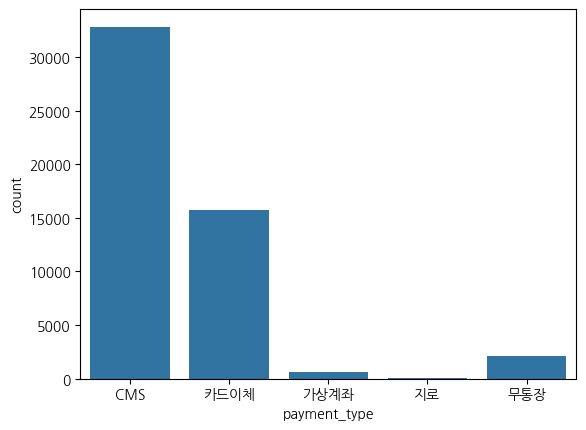

In [102]:
sns.countplot(data = df_LetalCars, x = 'payment_type') #가장 많은 분포 그래프로 확인 
plt.show()

### 나이별 지불 방식 분포 확인
- 기준 1 (나이)
    + 자동차 많이 렌트할 것 같은 연령대 : 20대 이상 60대 이하

- 기준 2 (지불 방식)
    + 지불 방식 : CMS ~ 지로

- 확인 방법
    + 기준 1에 해당되는 데이터를 가지고 기준 2에 해당하는 항목 매칭
    + 기준별 차트 출력

- 인사이트 : 40대 연령대에 지불 방식이 CMS가 가장 많이 차지 하므로 이 연령대에 혜택을 주어 카드 결제로 유도 필요 

In [103]:
# 기준 1 (나이)
# conditions_age = (df_LetalCars['age'] >= 20) & (df_LetalCars['age'] <= 60) query 를 사용하지 않으면 이렇게 매번 바꿔줘야함 즉 불편 그래서 query사용
conditions_age = '20 <= age < 60'

# 기준 2 (지불방식)
conditions_CMS = 'payment_type == "CMS"'
conditions_카드이체 = 'payment_type == "카드이체"'
conditions_무통장 = 'payment_type == "무통장"'
conditions_가상계좌 = 'payment_type == "가상계좌"'
conditions_지로 = 'payment_type == "지로"'

In [104]:
# '20 <= age < 60' and(이면서) 'payment_type == "CMS"' 인 조건 아래줄과 같음
df_LetalCars.query(f"{conditions_age} and {conditions_CMS}") #.value_counts 사용하면 카운트가됨 #query 사용


,id,type_of_contract,type_of_contract2,channel,datetime,Term,payment_type,product,amount,state,overdue_count,overdue,credit rating,bank,cancellation,age,Mileage
0,66758234,렌탈,Normal,서비스 방문,2019-10-20,60,CMS,K1,96900,계약확정,0,없음,9.0,새마을금고,정상,43.0,1862.0
4,66423204,멤버십,TAS,렌탈재계약,2019-10-20,12,CMS,K1,66900,해약확정,12,있음,8.0,농협은행,해약,51.0,1942.0
5,66165241,렌탈,Promotion,서비스 방문,2019-10-20,60,CMS,K3,90900,계약확정,0,없음,5.0,국민은행,정상,52.0,2001.0
9,66756702,렌탈,Promotion,서비스 방문,2019-10-20,60,CMS,K1,105900,계약확정,0,없음,1.0,신한은행,정상,24.0,1172.0
13,66757861,렌탈,Normal,서비스 방문,2019-10-20,60,CMS,K1,96900,계약확정,0,없음,1.0,국민은행,정상,34.0,1640.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51276,66798237,렌탈,Package,R법인그룹,2020-02-03,60,CMS,K3,101400,계약확정,0,없음,4.0,국민은행,정상,46.0,1974.0
51286,66441028,렌탈,Extension_Rental,R관리방판,2020-02-03,60,CMS,K2,78900,계약확정,0,없음,1.0,롯데카드,정상,51.0,2012.0
51290,66799369,렌탈,Normal,R관리방판,2020-02-03,60,CMS,K1,96900,해약확정,0,없음,1.0,국민은행,해약,48.0,2065.0
51294,66799558,렌탈,Normal,R관리방판,2020-02-03,60,CMS,K1,96900,해약확정,0,없음,8.0,새마을금고,해약,35.0,1627.0


In [105]:
# 연령별 CMS 분포
df_LetalCars_age_CMS = df_LetalCars.query(f"{conditions_age} and {conditions_CMS}") 
df_LetalCars_age_CMS.head(3)

,id,type_of_contract,type_of_contract2,channel,datetime,Term,payment_type,product,amount,state,overdue_count,overdue,credit rating,bank,cancellation,age,Mileage
0,66758234,렌탈,Normal,서비스 방문,2019-10-20,60,CMS,K1,96900,계약확정,0,없음,9.0,새마을금고,정상,43.0,1862.0
4,66423204,멤버십,TAS,렌탈재계약,2019-10-20,12,CMS,K1,66900,해약확정,12,있음,8.0,농협은행,해약,51.0,1942.0
5,66165241,렌탈,Promotion,서비스 방문,2019-10-20,60,CMS,K3,90900,계약확정,0,없음,5.0,국민은행,정상,52.0,2001.0


In [106]:
# 연령별 CMS 분포 확인 # cut을 사용 
bins = [20,30,40,50,60]
labels = ['20-29', '30-39', '40-49', '50-59']
df_LetalCars_age_CMS['age_group'] = pd.cut(df_LetalCars_age_CMS['age'], bins=bins, labels=labels )
df_LetalCars_age_CMS.head()

/tmp/ipykernel_16877/268146687.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_LetalCars_age_CMS['age_group'] = pd.cut(df_LetalCars_age_CMS['age'], bins=bins, labels=labels )


,id,type_of_contract,type_of_contract2,channel,datetime,Term,payment_type,product,amount,state,overdue_count,overdue,credit rating,bank,cancellation,age,Mileage,age_group
0,66758234,렌탈,Normal,서비스 방문,2019-10-20,60,CMS,K1,96900,계약확정,0,없음,9.0,새마을금고,정상,43.0,1862.0,40-49
4,66423204,멤버십,TAS,렌탈재계약,2019-10-20,12,CMS,K1,66900,해약확정,12,있음,8.0,농협은행,해약,51.0,1942.0,50-59
5,66165241,렌탈,Promotion,서비스 방문,2019-10-20,60,CMS,K3,90900,계약확정,0,없음,5.0,국민은행,정상,52.0,2001.0,50-59
9,66756702,렌탈,Promotion,서비스 방문,2019-10-20,60,CMS,K1,105900,계약확정,0,없음,1.0,신한은행,정상,24.0,1172.0,20-29
13,66757861,렌탈,Normal,서비스 방문,2019-10-20,60,CMS,K1,96900,계약확정,0,없음,1.0,국민은행,정상,34.0,1640.0,30-39


In [107]:
df_LetalCars_age_CMS['age_group'].value_counts() #.sort_index()는 옵션 

age_group
40-49    7175
30-39    5990
50-59    5347
20-29    3131
Name: count, dtype: int64

In [108]:
# 연령별 카드이체 분포
df_LetalCars_age_카드이체 = df_LetalCars.query(f"{conditions_age} and {conditions_카드이체}") #.value_counts 사용하면 카운트가됨 #query 사용
df_LetalCars_age_카드이체.head()

,id,type_of_contract,type_of_contract2,channel,datetime,Term,payment_type,product,amount,state,overdue_count,overdue,credit rating,bank,cancellation,age,Mileage
6,66751017,렌탈,Package,홈쇼핑/방송,2019-10-20,60,카드이체,K1,98400,계약확정,0,없음,1.0,롯데카드,정상,59.0,2348.0
10,66757254,렌탈,Package,홈쇼핑/방송,2019-10-20,60,카드이체,K1,81900,계약확정,0,없음,1.0,국민카드,정상,37.0,1555.0
11,66757254,렌탈,Package,홈쇼핑/방송,2019-10-20,60,카드이체,K2,81900,계약확정,0,없음,1.0,국민카드,정상,28.0,1503.0
12,66355286,렌탈,Promotion,서비스 방문,2019-10-20,60,카드이체,K3,90900,계약확정,0,없음,7.0,현대카드,정상,29.0,1428.0
17,66755490,렌탈,Promotion,렌탈총판,2019-10-20,60,카드이체,K1,105900,계약확정,0,없음,1.0,롯데카드,정상,47.0,1980.0


In [109]:
# 연령별 카드이체 분포 확인 # cut을 사용 
bins = [20,30,40,50,60]
labels = ['20-29', '30-39', '40-49', '50-59']
df_LetalCars_age_카드이체['age_group'] = pd.cut(df_LetalCars_age_카드이체['age'], bins=bins, labels=labels )
df_LetalCars_age_카드이체['age_group'].value_counts()

/tmp/ipykernel_16877/2329851776.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_LetalCars_age_카드이체['age_group'] = pd.cut(df_LetalCars_age_카드이체['age'], bins=bins, labels=labels )


age_group
40-49    3857
30-39    3272
50-59    2791
20-29    1694
Name: count, dtype: int64

In [110]:
# '20 <= age < 60' and(이면서) 'payment_type == "무통장"'
df_LetalCars.query(f"{conditions_age} and {conditions_무통장}")

,id,type_of_contract,type_of_contract2,channel,datetime,Term,payment_type,product,amount,state,overdue_count,overdue,credit rating,bank,cancellation,age,Mileage
48200,66796990,멤버십,TA2,하이마트,2020-01-28,36,무통장,K1,56979,계약확정,0,없음,3.0,NaN,정상,20.0,1217.0
51301,66799197,렌탈,Promotion,홈쇼핑/방송,2020-02-03,39,무통장,K5,120900,해약확정,0,없음,1.0,NaN,해약,51.0,2217.0


In [111]:
# '20 <= age < 60' and(이면서) 'payment_type == "가상계좌"'
df_LetalCars.query(f"{conditions_age} and {conditions_가상계좌}")

,id,type_of_contract,type_of_contract2,channel,datetime,Term,payment_type,product,amount,state,overdue_count,overdue,credit rating,bank,cancellation,age,Mileage


In [112]:
# '20 <= age < 60' and(이면서) 'payment_type == "지로"'
df_LetalCars.query(f"{conditions_age} and {conditions_지로}")

,id,type_of_contract,type_of_contract2,channel,datetime,Term,payment_type,product,amount,state,overdue_count,overdue,credit rating,bank,cancellation,age,Mileage


### 금액별 지불방식 분포
- 기준 1 (금액)
    + 큰 금액 기준 : 평균 이상

- 기준 2 (지불 방식)

- 접근 방식
    + 기준 1에 해당하는 기준 2의 각 항목 매칭

- 인사이트 : 결제시 CMS에 대한 95279.7 ~ 119460.0 사이 대상 고객으로 프로모션 진행 고려

In [113]:
amount_mean = df_LetalCars['amount'].mean()
amount_mean

93994.98002105099

In [114]:
# 해당 condition 작성
conditions_mean = f'amount > {amount_mean}'

In [115]:
# df_LetalCars.query(f'{conditions_mean} and {conditions_CMS}') # 원본
df_LetalCars_mean_CMS = df_LetalCars.query(f'{conditions_mean} and {conditions_CMS}') #변수를 만들어 담음
df_LetalCars_mean_CMS.head(3)

,id,type_of_contract,type_of_contract2,channel,datetime,Term,payment_type,product,amount,state,overdue_count,overdue,credit rating,bank,cancellation,age,Mileage
0,66758234,렌탈,Normal,서비스 방문,2019-10-20,60,CMS,K1,96900,계약확정,0,없음,9.0,새마을금고,정상,43.0,1862.0
2,66756657,렌탈,Normal,홈쇼핑/방송,2019-10-20,60,CMS,K1,96900,계약확정,0,없음,8.0,우리은행,정상,60.0,2363.0
9,66756702,렌탈,Promotion,서비스 방문,2019-10-20,60,CMS,K1,105900,계약확정,0,없음,1.0,신한은행,정상,24.0,1172.0


In [116]:
df_LetalCars_mean_CMS['amount_group'] = pd.cut(df_LetalCars_mean_CMS['amount'], bins=5)

/tmp/ipykernel_16877/3677849729.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_LetalCars_mean_CMS['amount_group'] = pd.cut(df_LetalCars_mean_CMS['amount'], bins=5)


In [117]:
df_LetalCars_mean_CMS['amount_group'].value_counts()

amount_group
(95279.7, 119460.0]     20730
(119460.0, 143520.0]     1363
(143520.0, 167580.0]      153
(167580.0, 191640.0]      101
(191640.0, 215700.0]        9
Name: count, dtype: int64

In [118]:
df_LetalCars.query(f"{conditions_mean} and {conditions_카드이체}")

,id,type_of_contract,type_of_contract2,channel,datetime,Term,payment_type,product,amount,state,overdue_count,overdue,credit rating,bank,cancellation,age,Mileage
1,66755948,렌탈,Extension_Rental,서비스 방문,2019-10-20,60,카드이체,K1,102900,계약확정,0,없음,2.0,현대카드,정상,62.0,2532.0
6,66751017,렌탈,Package,홈쇼핑/방송,2019-10-20,60,카드이체,K1,98400,계약확정,0,없음,1.0,롯데카드,정상,59.0,2348.0
8,66758007,렌탈,Normal,서비스 방문,2019-10-20,60,카드이체,K3,102900,계약확정,0,없음,2.0,롯데카드,정상,61.0,2447.0
17,66755490,렌탈,Promotion,렌탈총판,2019-10-20,60,카드이체,K1,105900,계약확정,0,없음,1.0,롯데카드,정상,47.0,1980.0
24,66755125,렌탈,Promotion,홈쇼핑/방송,2019-10-20,60,카드이체,K1,105900,계약확정,0,없음,1.0,롯데카드,정상,74.0,2947.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51292,66792261,렌탈,Normal,홈쇼핑/방송,2020-02-03,60,카드이체,K1,96900,계약확정,0,없음,1.0,롯데카드,정상,46.0,1779.0
51295,66799197,렌탈,Promotion,영업방판,2020-02-03,39,카드이체,K5,120900,해약확정,0,없음,1.0,롯데카드,해약,48.0,1869.0
51296,66792778,렌탈,Normal,홈쇼핑/방송,2020-02-03,60,카드이체,K1,96900,계약확정,0,없음,2.0,롯데카드,정상,44.0,1947.0
51300,66799558,렌탈,Normal,영업방판,2020-02-03,60,카드이체,K1,96900,해약확정,0,없음,8.0,롯데카드,해약,39.0,1753.0


In [119]:
df_LetalCars.query(f"{conditions_mean} and {conditions_무통장}")

,id,type_of_contract,type_of_contract2,channel,datetime,Term,payment_type,product,amount,state,overdue_count,overdue,credit rating,bank,cancellation,age,Mileage
51299,66579515,NaN,Promotion,R관리방판,2020-02-03,60,무통장,K3,96900,계약확정,0,없음,NaN,롯데카드,정상,NaN,NaN
51301,66799197,렌탈,Promotion,홈쇼핑/방송,2020-02-03,39,무통장,K5,120900,해약확정,0,없음,1.0,NaN,해약,51.0,2217.0


In [120]:
df_LetalCars.query(f"{conditions_mean} and {conditions_가상계좌}")

,id,type_of_contract,type_of_contract2,channel,datetime,Term,payment_type,product,amount,state,overdue_count,overdue,credit rating,bank,cancellation,age,Mileage
53,25869517,렌탈,Promotion,렌탈총판,2019-10-21,60,가상계좌,K1,96900,계약확정,0,없음,NaN,NaN,정상,NaN,NaN
202,25777820,렌탈,Promotion,R유통사,2019-10-21,36,가상계좌,K1,180750,계약확정,1,있음,NaN,NaN,정상,NaN,NaN
203,25777820,렌탈,Promotion,R유통사,2019-10-21,36,가상계좌,K1,180750,계약확정,1,있음,NaN,NaN,정상,NaN,NaN
204,25777820,렌탈,Promotion,R유통사,2019-10-21,36,가상계좌,K1,180750,계약확정,1,있음,NaN,NaN,정상,NaN,NaN
205,25777820,렌탈,Promotion,R유통사,2019-10-21,36,가상계좌,K1,96900,계약확정,0,없음,NaN,NaN,정상,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50965,25731755,렌탈,Normal,R빌리미,2020-02-02,60,가상계좌,K1,96900,계약확정,0,없음,NaN,NaN,정상,NaN,NaN
50966,25731755,렌탈,Normal,R빌리미,2020-02-02,60,가상계좌,K1,96900,계약확정,0,없음,NaN,NaN,정상,NaN,NaN
50967,25731755,렌탈,Normal,R빌리미,2020-02-02,60,가상계좌,K1,96900,계약확정,0,없음,NaN,NaN,정상,NaN,NaN
50968,25731755,렌탈,Normal,R빌리미,2020-02-02,60,가상계좌,K1,96900,계약확정,0,없음,NaN,NaN,정상,NaN,NaN


In [121]:
df_LetalCars.query(f"{conditions_mean} and {conditions_지로}")

,id,type_of_contract,type_of_contract2,channel,datetime,Term,payment_type,product,amount,state,overdue_count,overdue,credit rating,bank,cancellation,age,Mileage
350,25742702,렌탈,Normal,서비스 방문,2019-10-21,60,지로,K2,96900,계약확정,0,없음,NaN,NaN,정상,NaN,NaN
553,25871000,렌탈,Promotion,서비스 방문,2019-10-21,60,지로,K1,124200,계약확정,0,없음,NaN,NaN,정상,NaN,NaN
933,25796407,렌탈,Normal,서비스 방문,2019-10-22,60,지로,K1,96900,계약확정,1,있음,NaN,NaN,정상,NaN,NaN
987,25742660,렌탈,Promotion,서비스 방문,2019-10-22,60,지로,K1,124200,계약확정,0,없음,NaN,NaN,정상,NaN,NaN
6021,25853485,렌탈,Promotion,렌탈총판,2019-10-30,60,지로,K1,108900,계약확정,0,없음,NaN,NaN,정상,NaN,NaN
8566,66251159,렌탈,Normal,서비스 방문,2019-11-04,60,지로,K2,96900,계약확정,0,없음,NaN,NaN,정상,NaN,NaN
11594,25787494,렌탈,Normal,서비스 방문,2019-11-10,60,지로,K1,96900,계약확정,0,없음,NaN,NaN,정상,NaN,NaN
12865,25740763,렌탈,Package,서비스 방문,2019-11-12,60,지로,K1,116700,계약확정,0,없음,NaN,NaN,정상,NaN,NaN
14555,25864525,렌탈,Promotion,영업방판,2019-11-14,60,지로,K1,142200,계약확정,0,없음,NaN,NaN,정상,NaN,NaN
15913,25740576,렌탈,Normal,서비스 방문,2019-11-18,60,지로,K1,96900,계약확정,0,없음,NaN,NaN,정상,NaN,NaN
